In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs

In [4]:
x,y=make_blobs(n_samples=1000, centers=3, n_features=2)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [14]:
from sklearn.cluster import KMeans


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(x_trained_scaled)
    WCSS.append(kmeans.inertia_)

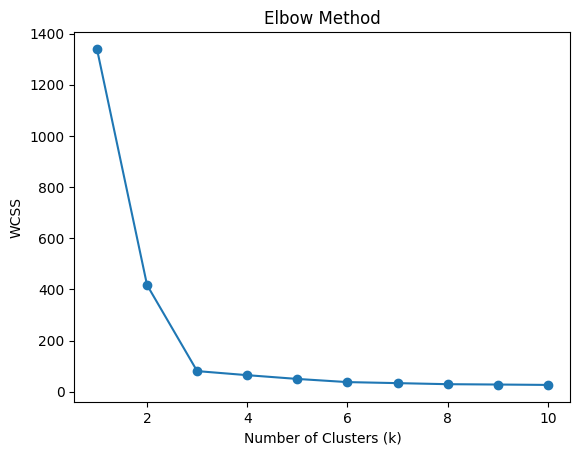

In [17]:
# Optional: plot the elbow curve
plt.plot(range(1, 11), WCSS, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [19]:
kmeans.fit_predict(x_trained_scaled)

array([1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1,
       1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2,
       1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1,

In [21]:
y_pred = kmeans.predict(x_test)


In [22]:
!pip install kneed 

In [23]:
from kneed import knee_locator

In [25]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')

In [26]:
kl.elbow

np.int64(3)

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
coefficients = []  # To store silhouette scores

for k in range(2, 11):  # Silhouette score is valid only for k >= 2
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(x_trained_scaled)
    labels = kmeans.labels_
    score = silhouette_score(x_trained_scaled, labels)
    coefficients.append(score)
    print(f"For n_clusters = {k}, Silhouette Score = {score}")


For n_clusters = 2, Silhouette Score = 0.6565169505279561
For n_clusters = 3, Silhouette Score = 0.779060999614521
For n_clusters = 4, Silhouette Score = 0.6736389005800564
For n_clusters = 5, Silhouette Score = 0.5688474704211617
For n_clusters = 6, Silhouette Score = 0.4374138361757354
For n_clusters = 7, Silhouette Score = 0.42208030935496343
For n_clusters = 8, Silhouette Score = 0.4027338118491456
For n_clusters = 9, Silhouette Score = 0.378495817158861
For n_clusters = 10, Silhouette Score = 0.3581174312905724


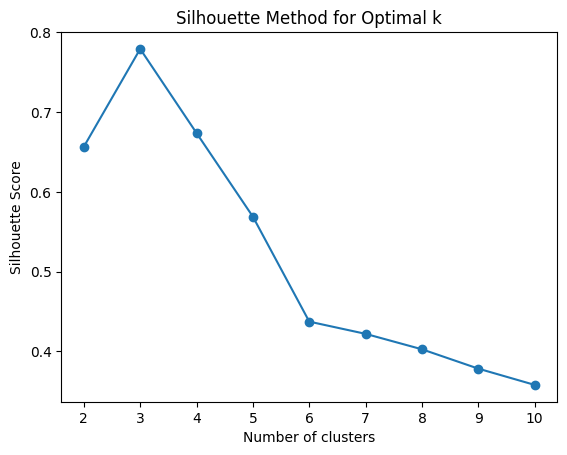

In [29]:
plt.plot(range(2, 11), coefficients, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()